Train a base VAE model with custom dataset and custom 1d convolutional encoder and decoder.

In [2]:
import os, time, tqdm
import numpy as np
import torch
# add parent directory to path
import sys
print("Current working directory: ", os.getcwd())
# Get the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)

from models.dmp import CanonicalSystem, SingleDMP
from models.vae import CVAE
from torch.utils.data import DataLoader
from utils.data_loader import DataLoader as num_dataset
from utils.early_stop import EarlyStop
from matplotlib import pyplot as plt
plt.ion()

Current working directory:  /home/binzhao/Documents/code/VAE_DMP_mani/models


In [4]:
shape = (2, 100)

# create dataset for training and testing
cs = CanonicalSystem(dt=0.01, ax=1)
dmp = SingleDMP(n_bfs=50, cs=cs, run_time=1.0, dt=0.01)
train_dataset = num_dataset(run_time=1, dmp=dmp, dt=0.01, dof=2)
test_dataset = num_dataset(run_time=1, dmp=dmp, dt=0.01, dof=2)
train_dataset.load_data('../data/number_write/train_paths.npz')
# test_dataset.load_data('../data/test_paths.npz')
print("train dataset size: ", len(train_dataset))
# print("test dataset size: ", len(test_dataset))

# create dataloader for training and testing
train_iter = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_iter = DataLoader(test_dataset, batch_size=64, shuffle=True)

# create model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae_net = CVAE(shape=shape, nclass=10, nhid=8, ncond=8)
vae_net.to(device)

train dataset size:  10000


CVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv1d(2, 16, kernel_size=(5,), stride=(2,))
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv1d(16, 32, kernel_size=(5,), stride=(2,))
      (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv1d(32, 64, kernel_size=(3,), stride=(2,))
      (8): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv1d(64, 64, kernel_size=(3,), stride=(2,))
      (11): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
        (mlp): Seque

In [5]:
#%% train model
lr = 1e-4
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, vae_net.parameters()), lr=lr, weight_decay=0.0001)

def adjust_lr(optimizer, decay_rate=0.95):
    for param_group in optimizer.param_groups:
        param_group['lr'] *= decay_rate

#%% if load
save_name = "cVAE_base.pt"
retrain = True
if os.path.exists(save_name):
    print("Model parameters have already been trained before. Retrain ? (y/n)")
    ans = input()
    if not (ans == 'y'):
        checkpoint = torch.load(save_name, map_location=device)
        vae_net.load_state_dict(checkpoint["net"])
        optimizer.load_state_dict(checkpoint["optimizer"])
        for g in optimizer.param_groups:
            g['lr'] = lr

training on  cuda


100%|██████████| 157/157 [00:00<00:00, 293.83it/s]

epoch 0, train loss 0.1149 , time 0.5 sec


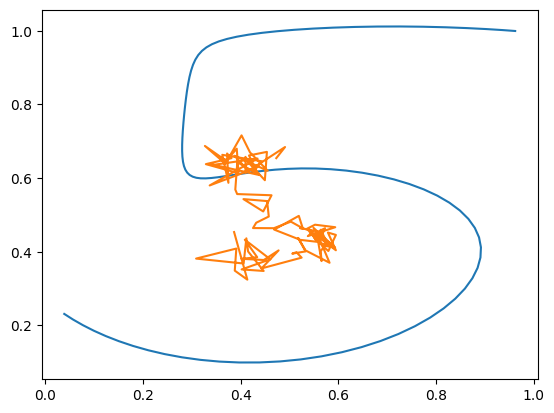

100%|██████████| 157/157 [00:00<00:00, 485.58it/s]


epoch 1, train loss 0.0264 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 441.45it/s]


epoch 2, train loss 0.0145 , time 0.4 sec


100%|██████████| 157/157 [00:00<00:00, 497.96it/s]


epoch 3, train loss 0.0087 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 481.43it/s]


epoch 4, train loss 0.0054 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 519.36it/s]


epoch 5, train loss 0.0035 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 497.84it/s]


epoch 6, train loss 0.0023 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 520.14it/s]


epoch 7, train loss 0.0016 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 493.56it/s]


epoch 8, train loss 0.0012 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 506.50it/s]


epoch 9, train loss 0.0010 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 533.19it/s]


epoch 10, train loss 0.0008 , time 0.3 sec


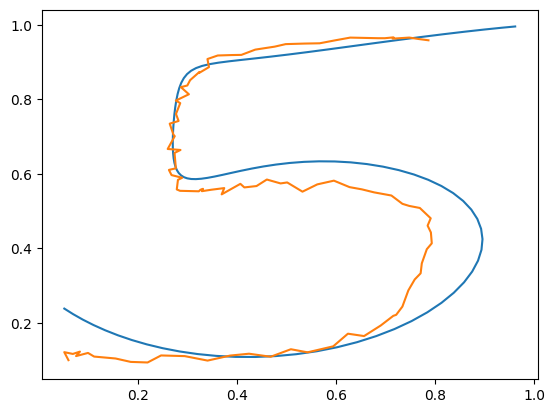

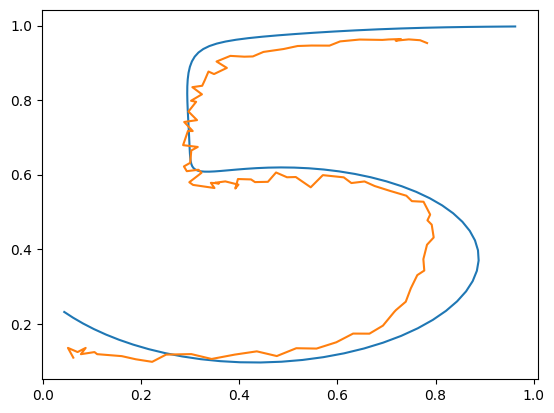

100%|██████████| 157/157 [00:00<00:00, 503.14it/s]


epoch 11, train loss 0.0007 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 513.86it/s]


epoch 12, train loss 0.0006 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 496.03it/s]


epoch 13, train loss 0.0005 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 509.90it/s]


epoch 14, train loss 0.0004 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 520.97it/s]


epoch 15, train loss 0.0004 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 519.58it/s]


epoch 16, train loss 0.0003 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 491.35it/s]


epoch 17, train loss 0.0003 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 511.16it/s]


epoch 18, train loss 0.0003 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 510.21it/s]


epoch 19, train loss 0.0003 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 499.86it/s]


epoch 20, train loss 0.0003 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 516.32it/s]


epoch 21, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 515.69it/s]


epoch 22, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 497.86it/s]


epoch 23, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 515.77it/s]


epoch 24, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 507.70it/s]


epoch 25, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 525.78it/s]


epoch 26, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 520.21it/s]


epoch 27, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 502.35it/s]


epoch 28, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 505.31it/s]


epoch 29, train loss 0.0002 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 470.37it/s]

epoch 30, train loss 0.0002 , time 0.3 sec


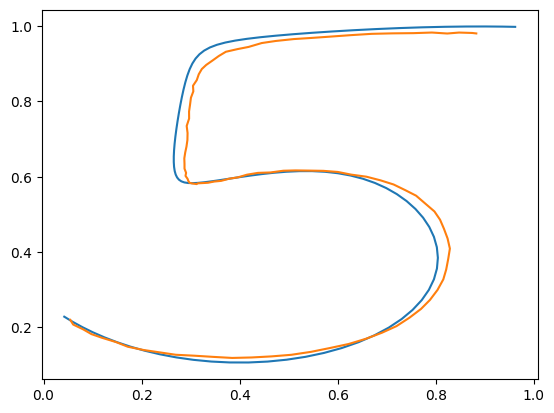

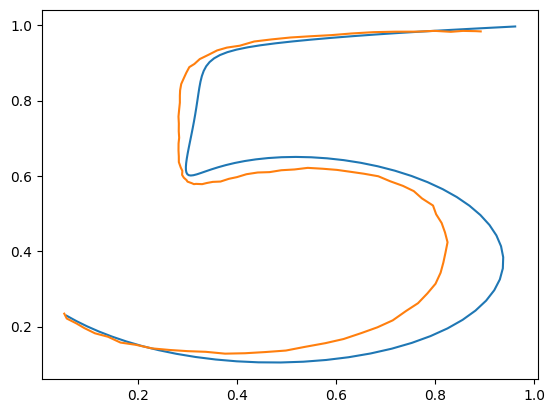

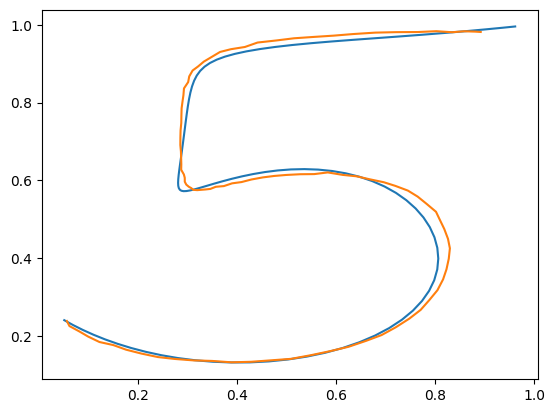

EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 485.68it/s]


epoch 31, train loss 0.0002 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 495.48it/s]


epoch 32, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 501.58it/s]


epoch 33, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 500.51it/s]


epoch 34, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 490.00it/s]


epoch 35, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 520.70it/s]


epoch 36, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 494.43it/s]


epoch 37, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 502.60it/s]


epoch 38, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 503.08it/s]


epoch 39, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 482.98it/s]


epoch 40, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 501.79it/s]


epoch 41, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 494.80it/s]


epoch 42, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 506.69it/s]


epoch 43, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 510.40it/s]


epoch 44, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 520.89it/s]


epoch 45, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 513.22it/s]


epoch 46, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 506.47it/s]


epoch 47, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 514.05it/s]


epoch 48, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 513.72it/s]


epoch 49, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 512.16it/s]

epoch 50, train loss 0.0001 , time 0.3 sec


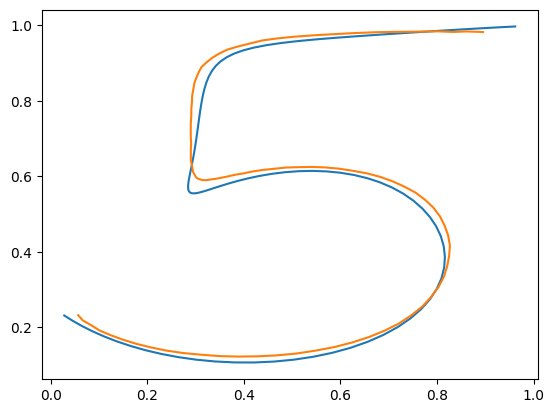

EarlyStopping counter: 3 out of 20


100%|██████████| 157/157 [00:00<00:00, 511.70it/s]


epoch 51, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 4 out of 20


100%|██████████| 157/157 [00:00<00:00, 508.89it/s]


epoch 52, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 501.97it/s]


epoch 53, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 506.13it/s]


epoch 54, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 509.40it/s]


epoch 55, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 513.95it/s]


epoch 56, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 514.03it/s]


epoch 57, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 3 out of 20


100%|██████████| 157/157 [00:00<00:00, 509.29it/s]


epoch 58, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 4 out of 20


100%|██████████| 157/157 [00:00<00:00, 510.69it/s]


epoch 59, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 511.16it/s]

epoch 60, train loss 0.0001 , time 0.3 sec


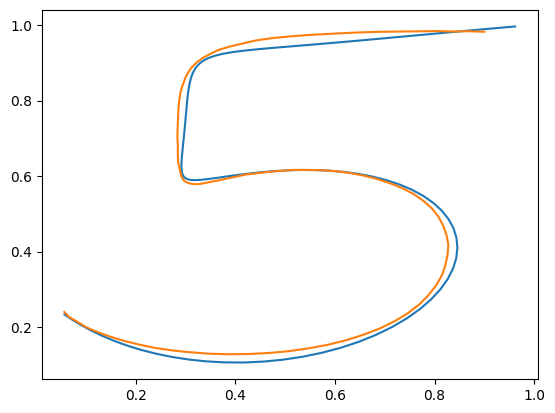

EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 513.56it/s]


epoch 61, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 511.76it/s]


epoch 62, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 510.11it/s]


epoch 63, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 511.00it/s]


epoch 64, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 500.23it/s]


epoch 65, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 509.73it/s]


epoch 66, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 508.24it/s]


epoch 67, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 3 out of 20


100%|██████████| 157/157 [00:00<00:00, 512.84it/s]


epoch 68, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 4 out of 20


100%|██████████| 157/157 [00:00<00:00, 500.26it/s]


epoch 69, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 513.10it/s]

epoch 70, train loss 0.0001 , time 0.3 sec


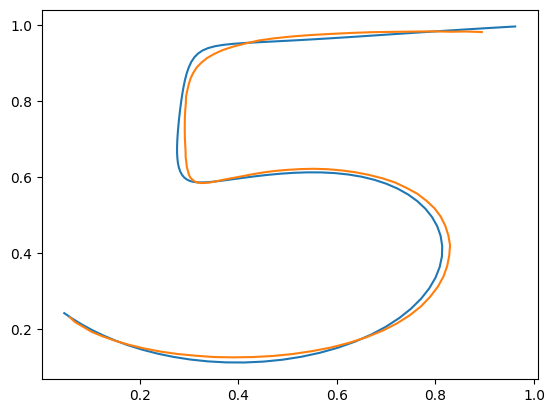

EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 513.93it/s]


epoch 71, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 507.34it/s]


epoch 72, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 3 out of 20


100%|██████████| 157/157 [00:00<00:00, 513.51it/s]


epoch 73, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 515.81it/s]


epoch 74, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 521.75it/s]


epoch 75, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 517.83it/s]


epoch 76, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 503.28it/s]


epoch 77, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 470.52it/s]


epoch 78, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 3 out of 20


100%|██████████| 157/157 [00:00<00:00, 522.87it/s]


epoch 79, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 4 out of 20


100%|██████████| 157/157 [00:00<00:00, 517.18it/s]

epoch 80, train loss 0.0001 , time 0.3 sec


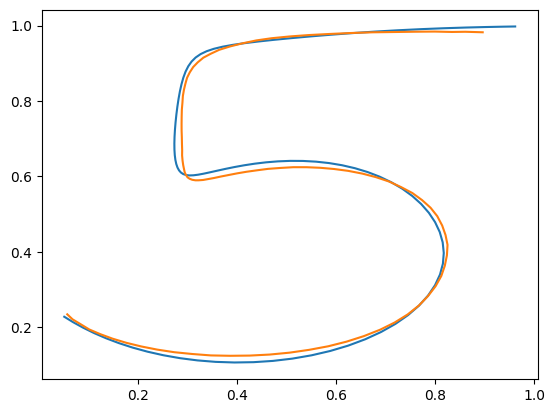

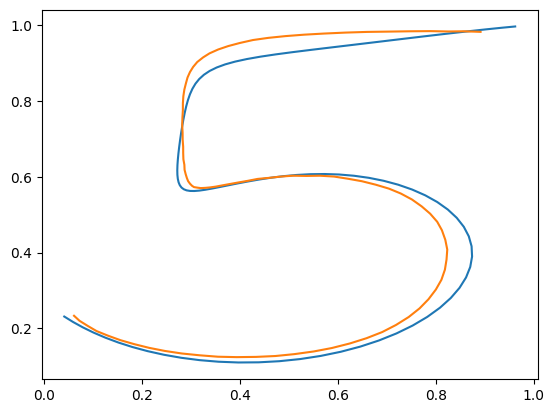

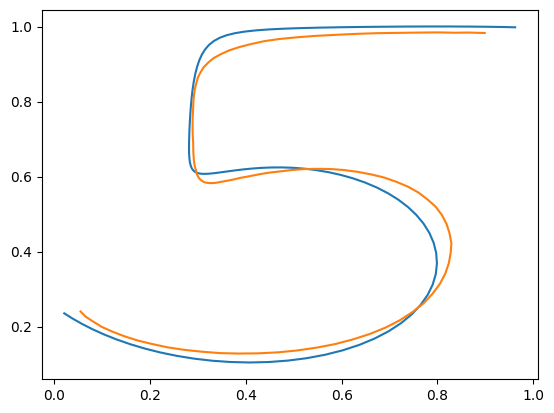

EarlyStopping counter: 5 out of 20


100%|██████████| 157/157 [00:00<00:00, 501.33it/s]


epoch 81, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 6 out of 20


100%|██████████| 157/157 [00:00<00:00, 532.27it/s]


epoch 82, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 7 out of 20


100%|██████████| 157/157 [00:00<00:00, 470.11it/s]


epoch 83, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 8 out of 20


100%|██████████| 157/157 [00:00<00:00, 508.17it/s]


epoch 84, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 514.96it/s]


epoch 85, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 522.49it/s]


epoch 86, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 513.87it/s]


epoch 87, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 528.76it/s]


epoch 88, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 464.57it/s]


epoch 89, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 519.45it/s]

epoch 90, train loss 0.0001 , time 0.3 sec


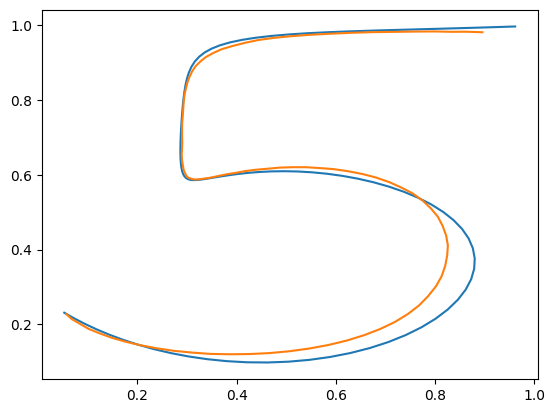

EarlyStopping counter: 3 out of 20


100%|██████████| 157/157 [00:00<00:00, 462.36it/s]


epoch 91, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 4 out of 20


100%|██████████| 157/157 [00:00<00:00, 515.54it/s]


epoch 92, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 5 out of 20


100%|██████████| 157/157 [00:00<00:00, 493.94it/s]


epoch 93, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 6 out of 20


100%|██████████| 157/157 [00:00<00:00, 497.19it/s]


epoch 94, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 7 out of 20


100%|██████████| 157/157 [00:00<00:00, 511.28it/s]


epoch 95, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 8 out of 20


100%|██████████| 157/157 [00:00<00:00, 498.94it/s]


epoch 96, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 9 out of 20


100%|██████████| 157/157 [00:00<00:00, 504.54it/s]


epoch 97, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 514.79it/s]


epoch 98, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 506.03it/s]


epoch 99, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 486.43it/s]

epoch 100, train loss 0.0001 , time 0.3 sec


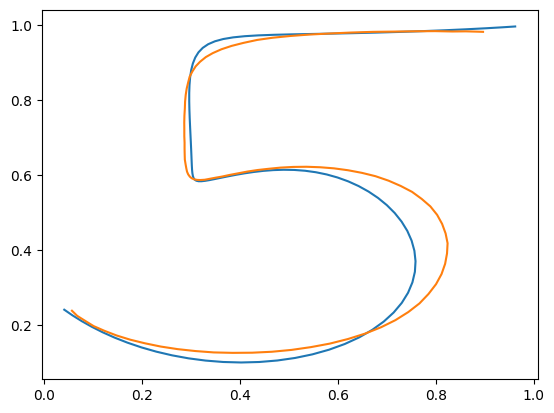

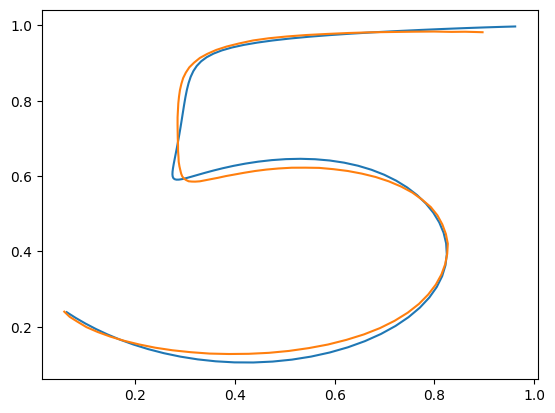

EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 504.93it/s]


epoch 101, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 503.78it/s]


epoch 102, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 3 out of 20


100%|██████████| 157/157 [00:00<00:00, 488.14it/s]


epoch 103, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 4 out of 20


100%|██████████| 157/157 [00:00<00:00, 495.86it/s]


epoch 104, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 5 out of 20


100%|██████████| 157/157 [00:00<00:00, 526.18it/s]


epoch 105, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 6 out of 20


100%|██████████| 157/157 [00:00<00:00, 507.25it/s]


epoch 106, train loss 0.0001 , time 0.3 sec


100%|██████████| 157/157 [00:00<00:00, 490.64it/s]


epoch 107, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 1 out of 20


100%|██████████| 157/157 [00:00<00:00, 509.88it/s]


epoch 108, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 2 out of 20


100%|██████████| 157/157 [00:00<00:00, 514.76it/s]


epoch 109, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 3 out of 20


100%|██████████| 157/157 [00:00<00:00, 515.92it/s]

epoch 110, train loss 0.0001 , time 0.3 sec


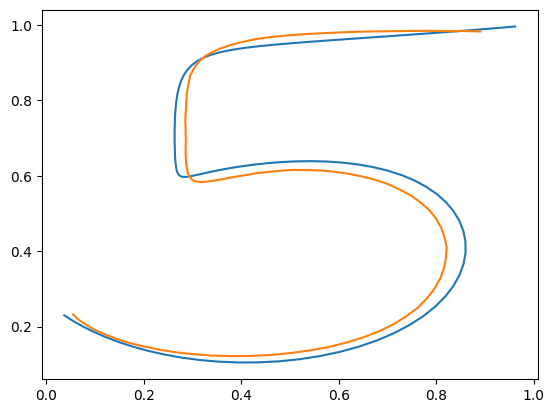

EarlyStopping counter: 4 out of 20


100%|██████████| 157/157 [00:00<00:00, 475.27it/s]


epoch 111, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 5 out of 20


100%|██████████| 157/157 [00:00<00:00, 513.39it/s]


epoch 112, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 6 out of 20


100%|██████████| 157/157 [00:00<00:00, 484.18it/s]


epoch 113, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 7 out of 20


100%|██████████| 157/157 [00:00<00:00, 508.26it/s]


epoch 114, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 8 out of 20


100%|██████████| 157/157 [00:00<00:00, 504.08it/s]


epoch 115, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 9 out of 20


100%|██████████| 157/157 [00:00<00:00, 515.04it/s]


epoch 116, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 10 out of 20


100%|██████████| 157/157 [00:00<00:00, 481.70it/s]


epoch 117, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 11 out of 20


100%|██████████| 157/157 [00:00<00:00, 492.91it/s]


epoch 118, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 12 out of 20


100%|██████████| 157/157 [00:00<00:00, 516.88it/s]


epoch 119, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 13 out of 20


100%|██████████| 157/157 [00:00<00:00, 509.01it/s]

epoch 120, train loss 0.0001 , time 0.3 sec


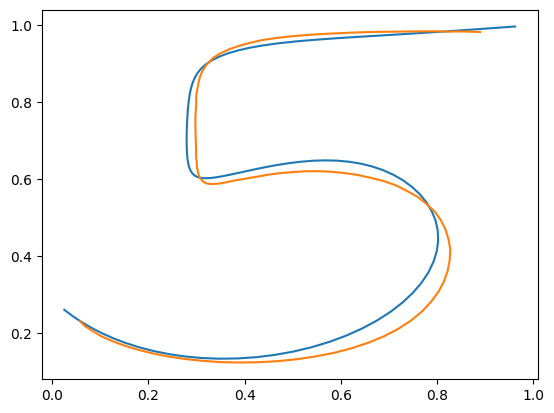

EarlyStopping counter: 14 out of 20


100%|██████████| 157/157 [00:00<00:00, 494.03it/s]


epoch 121, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 15 out of 20


100%|██████████| 157/157 [00:00<00:00, 484.56it/s]


epoch 122, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 16 out of 20


100%|██████████| 157/157 [00:00<00:00, 527.08it/s]


epoch 123, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 17 out of 20


100%|██████████| 157/157 [00:00<00:00, 526.06it/s]


epoch 124, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 18 out of 20


100%|██████████| 157/157 [00:00<00:00, 523.05it/s]


epoch 125, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 19 out of 20


100%|██████████| 157/157 [00:00<00:00, 489.32it/s]

epoch 126, train loss 0.0001 , time 0.3 sec
EarlyStopping counter: 20 out of 20


In [6]:
max_epochs = 1000
early_stop = EarlyStop(patience=20, save_name=save_name)

print("training on ", device)
for epoch in range(max_epochs):

    train_loss, n, start = 0.0, 0, time.time()
    for X, y in tqdm.tqdm(train_iter, ncols=50):
        X = X.to(device)
        # only use the first dimension of y
        y = y[:, 0].to(device)
        X_hat, mean, logvar = vae_net(X, y)

        l = vae_net.loss(X, X_hat, mean, logvar).to(device)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        train_loss += l.cpu().item()
        n += X.shape[0]

    train_loss /= n
    print('epoch %d, train loss %.4f , time %.1f sec'
          % (epoch, train_loss, time.time() - start))

    adjust_lr(optimizer)

    # ------------ plot the training result ------------
    check_number = 5
    if epoch % 10 == 0:
        for i in range(X.shape[0]):
            if y[i] == check_number:
                data = X[i, :, :].cpu().numpy()
                data1 = X_hat[i, :, :].detach().cpu().numpy()
                plt.plot(data[0,:], data[1,:])
                plt.plot(data1[0, :], data1[1, :])
            plt.show()

    if (early_stop(train_loss, vae_net, optimizer)):
        break

(2, 100)


/tmp/ipykernel_165576/520375744.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(early_stop.save_name)


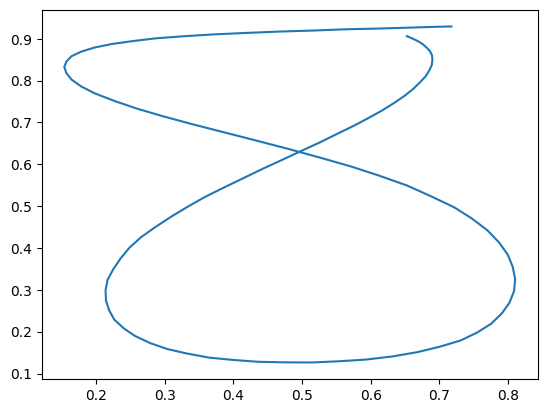

In [9]:
checkpoint = torch.load(early_stop.save_name)
vae_net.load_state_dict(checkpoint["net"])
vae_net.eval()

#%%
number = 8
with torch.no_grad():
    x = vae_net.generate(number)

data = x.cpu().numpy()[0]
print(data.shape)
plt.plot(data[0, :], data[1, :])
plt.show()